<a href="https://colab.research.google.com/github/AV-016/Research-on-LSTM/blob/main/Stock_market_epochs%3D20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


📈 Processing AAPL...



[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
📊 AAPL RMSE: 7.1337
📊 AAPL MAPE: 2.69%


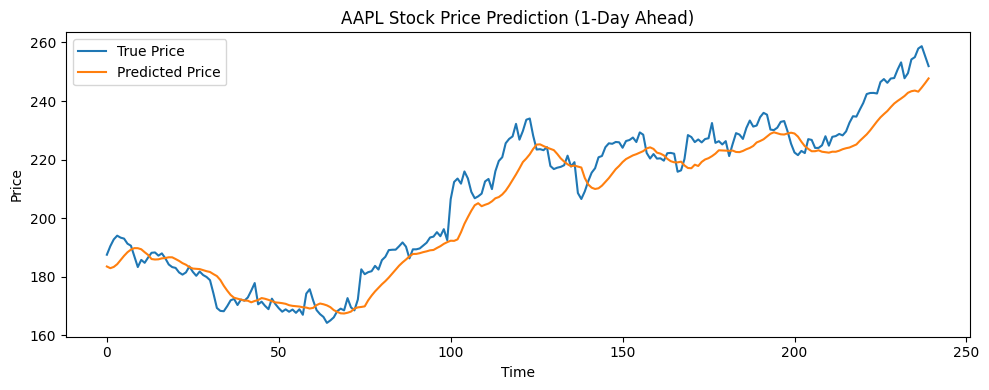

[*********************100%***********************]  1 of 1 completed


📈 Processing MSFT...




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
📊 MSFT RMSE: 12.5419
📊 MSFT MAPE: 2.32%


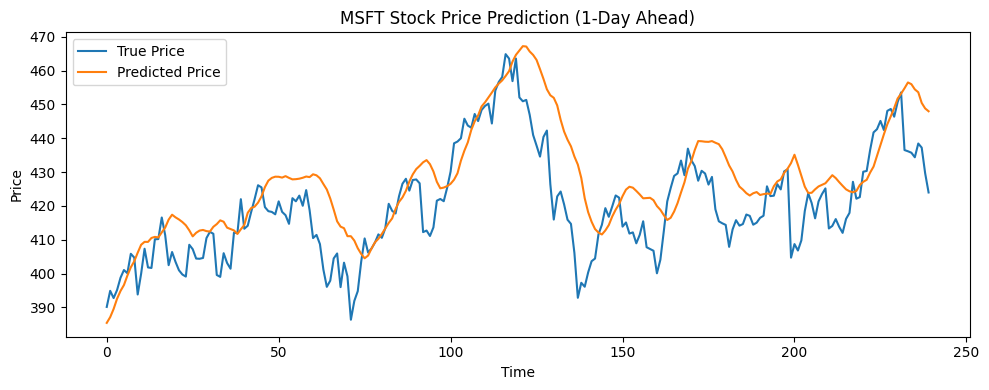


📈 Processing GOOGL...



[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
📊 GOOGL RMSE: 6.1803
📊 GOOGL MAPE: 2.97%


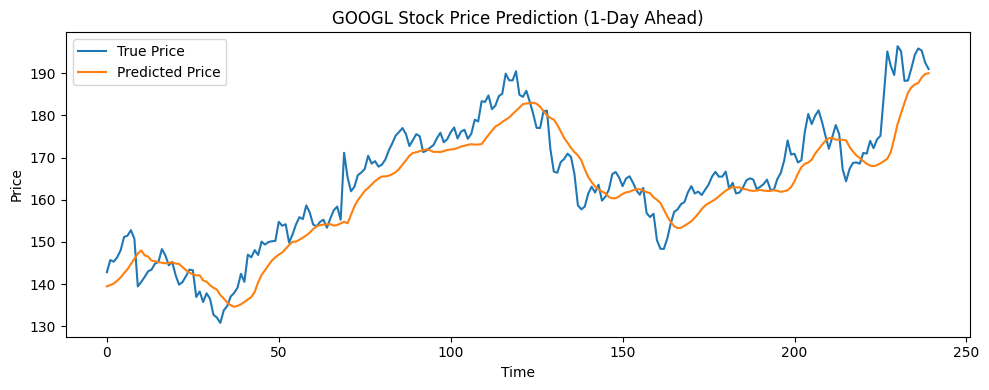

[*********************100%***********************]  1 of 1 completed


📈 Processing AMZN...




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
📊 AMZN RMSE: 7.7709
📊 AMZN MAPE: 3.28%


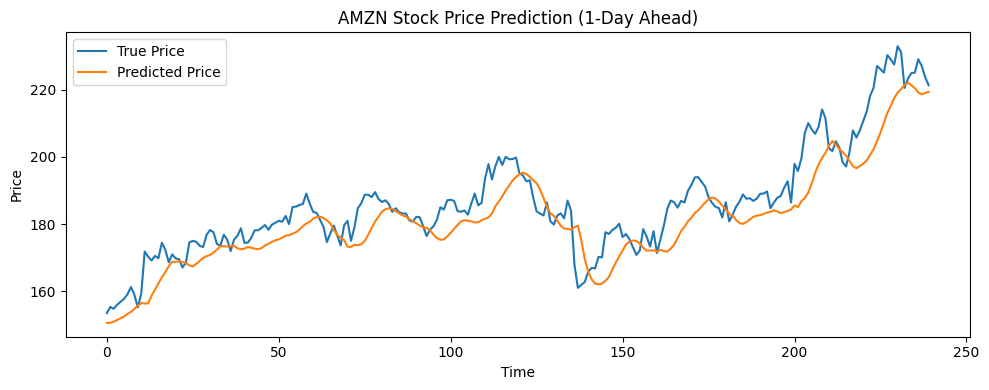


📊 Evaluation Results (RMSE & MAPE) saved to 'stock_price_predictions_results.csv':

Empty DataFrame
Columns: [Ticker, 1-Day RMSE, 1-Day MAPE (%), 7-Day RMSE, 7-Day MAPE (%)]
Index: []


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# List of tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

# Set window size and training params
window_size = 60
epochs = 20
batch_size = 32

def prepare_data(df):
    df = df[['Close', 'High', 'Low', 'Volume']]
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    X, y = [], []
    for i in range(window_size, len(scaled_data)-1):
        X.append(scaled_data[i-window_size:i])
        y.append(scaled_data[i + 1][0])  # Predict 'Close' price

    X, y = np.array(X), np.array(y)

    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    return X_train, X_test, y_train, y_test, scaler

def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


# Initialize results dictionary
results = {
    'Ticker': [],
    '1-Day RMSE': [],
    '1-Day MAPE (%)': [],
    '7-Day RMSE': [],
    '7-Day MAPE (%)': []
}


# Loop through all tickers
for ticker in tickers:
    print(f"\n📈 Processing {ticker}...\n")
    df = yf.download(ticker, start='2020-01-01', end='2024-12-31')
    X_train, X_test, y_train, y_test, scaler = prepare_data(df)

    model = build_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Predict
    predicted = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(
        np.concatenate((predicted, np.zeros((len(predicted), 3))), axis=1)
    )[:, 0]

    # True prices for comparison
    true_prices = scaler.inverse_transform(
        np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 3))), axis=1)
    )[:, 0]

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(true_prices, predicted_prices))
    mape = mean_absolute_percentage_error(true_prices, predicted_prices) * 100

    print(f"📊 {ticker} RMSE: {rmse:.4f}")
    print(f"📊 {ticker} MAPE: {mape:.2f}%")

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(true_prices, label='True Price')
    plt.plot(predicted_prices, label='Predicted Price')
    plt.title(f'{ticker} Stock Price Prediction (1-Day Ahead)')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()


    # Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Save the table as a CSV file
results_df.to_csv('stock_price_predictions_results.csv', index=False)

# Print the table
print("\n📊 Evaluation Results (RMSE & MAPE) saved to 'stock_price_predictions_results.csv':\n")
print(results_df)



[*********************100%***********************]  1 of 1 completed


📈 Processing AAPL...




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


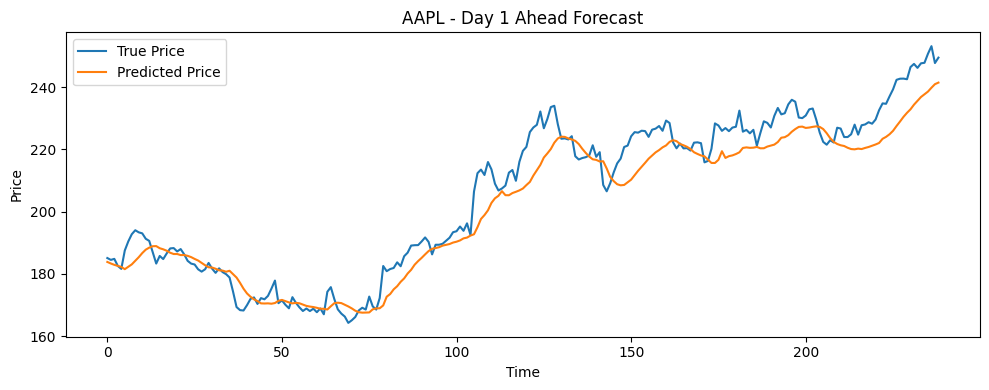

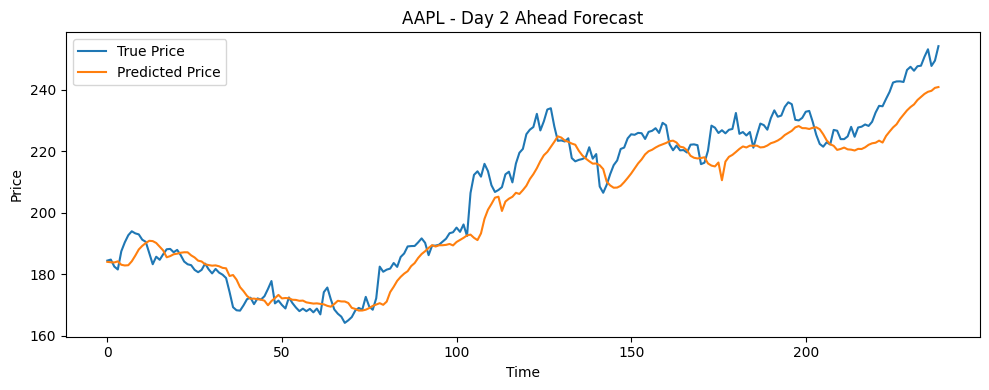

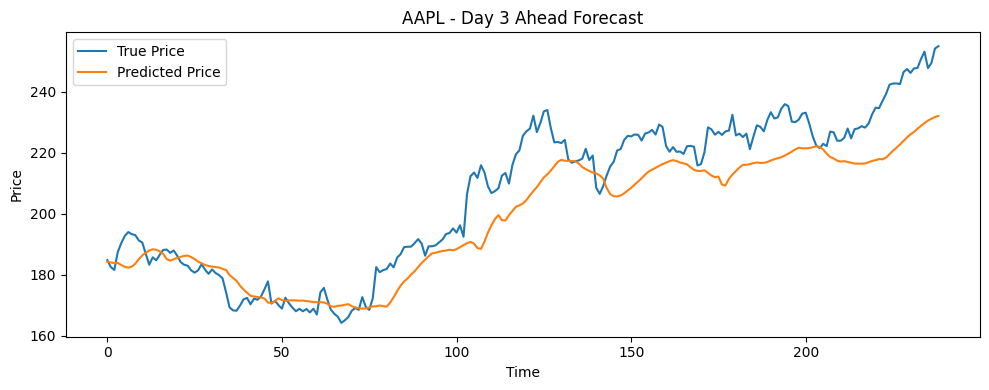

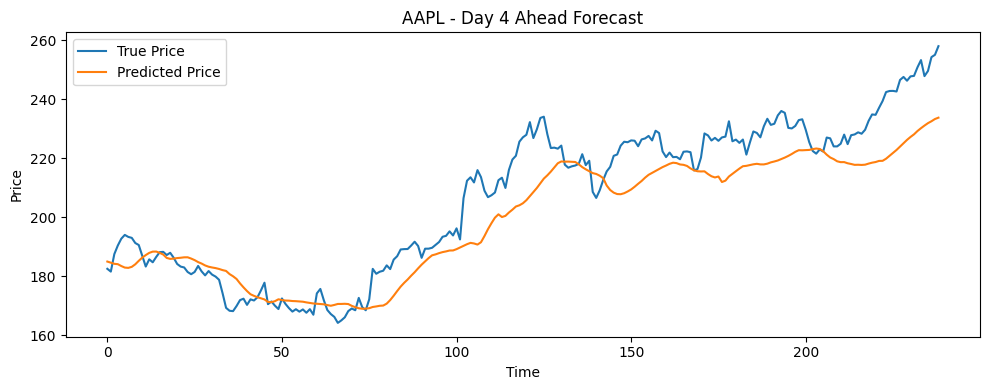

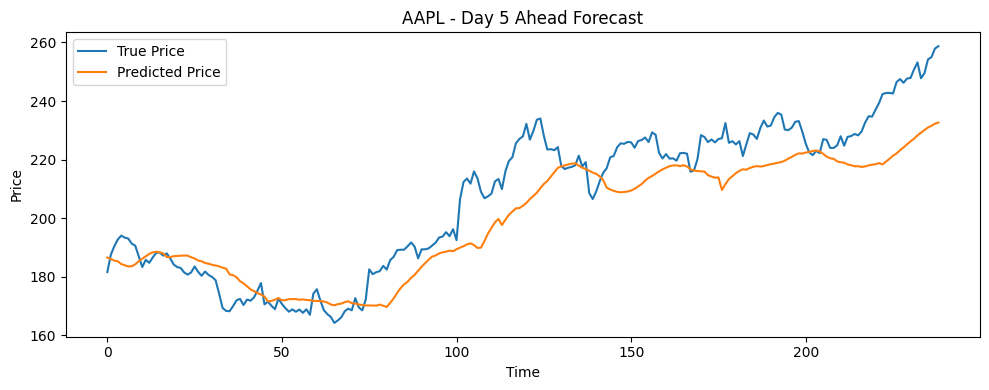

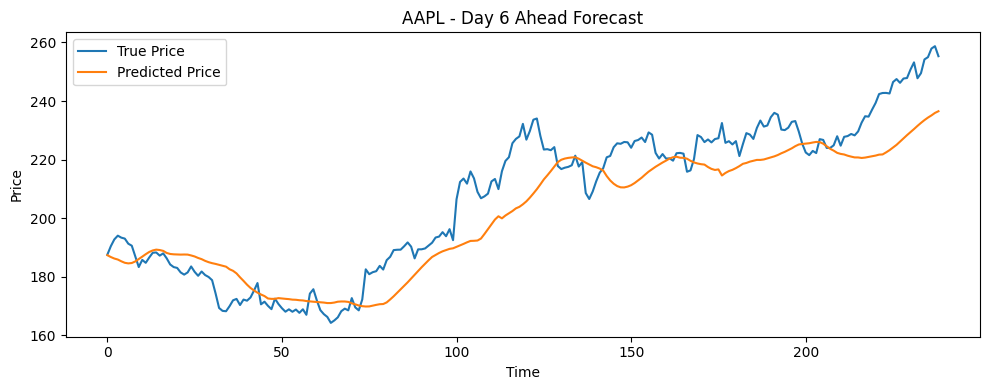

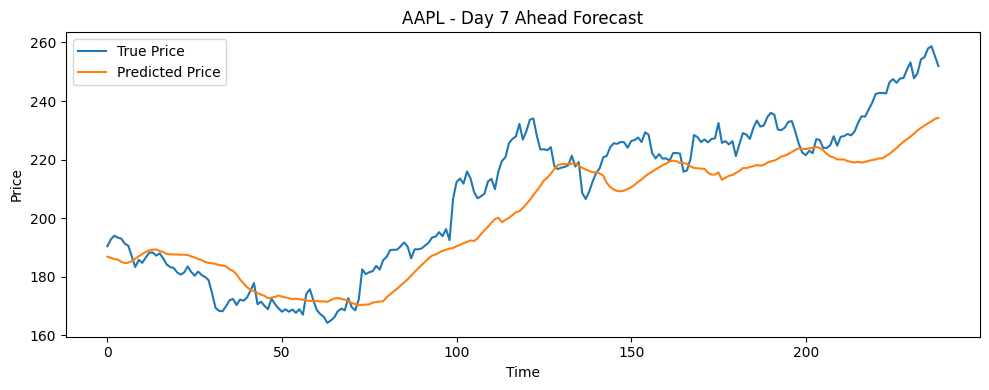

[*********************100%***********************]  1 of 1 completed

📊 AAPL Average RMSE over 7 days: 10.3531
📊 AAPL Average MAPE over 7 days: 3.85%

📈 Processing MSFT...




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


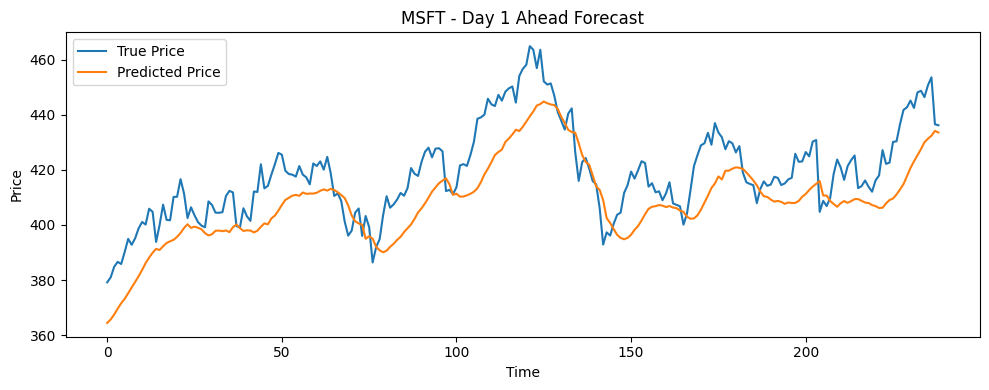

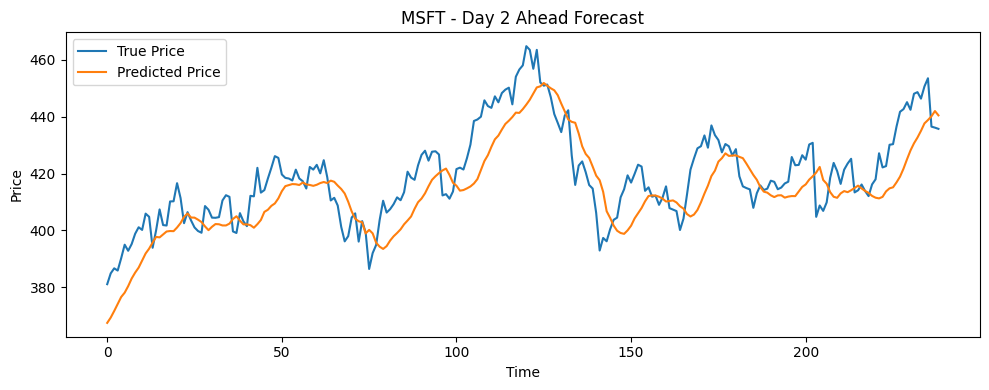

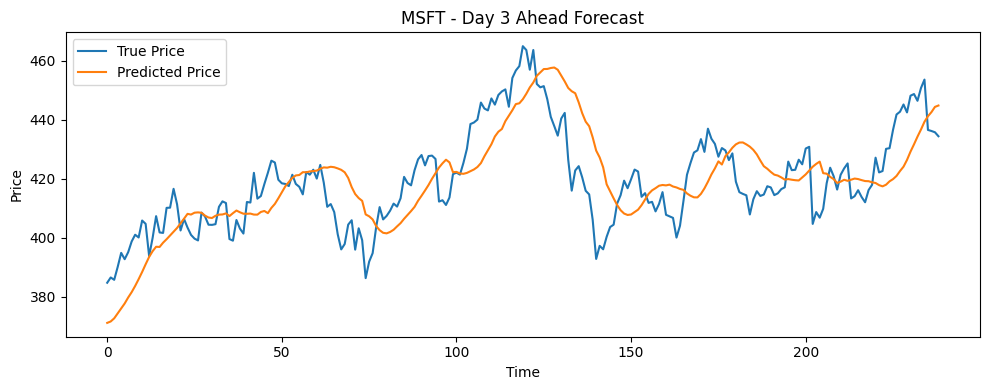

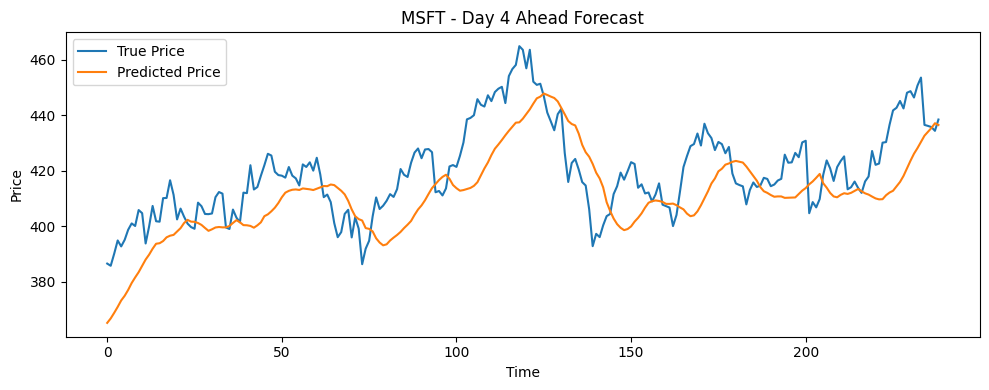

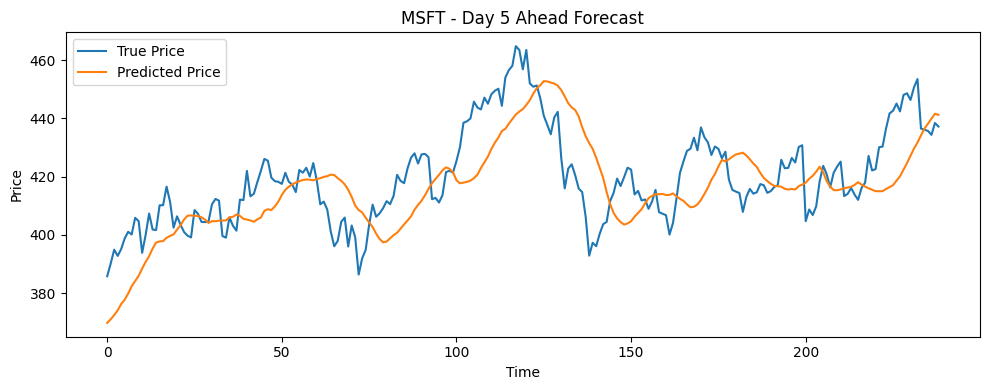

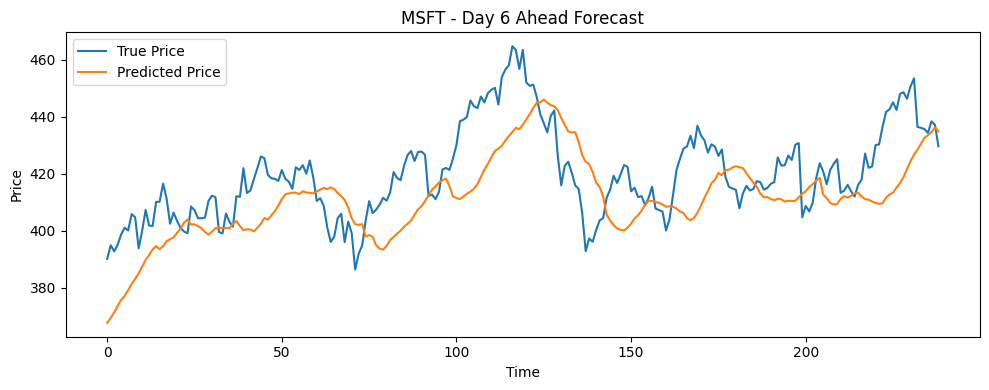

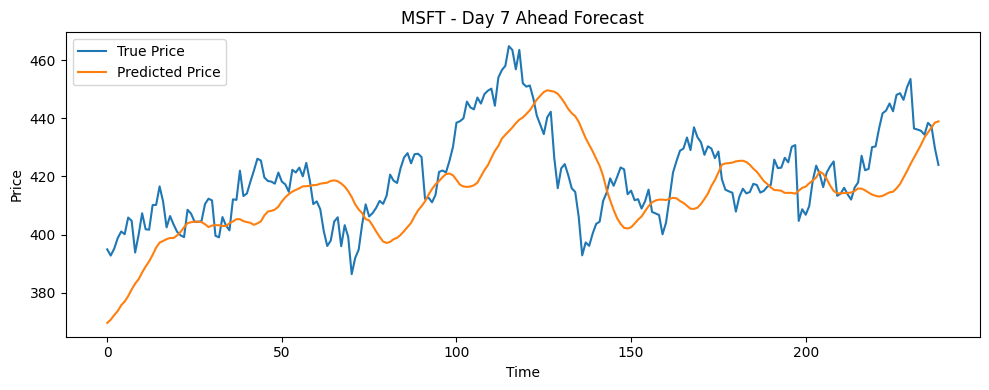

[*********************100%***********************]  1 of 1 completed

📊 MSFT Average RMSE over 7 days: 13.8516
📊 MSFT Average MAPE over 7 days: 2.74%

📈 Processing GOOGL...




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


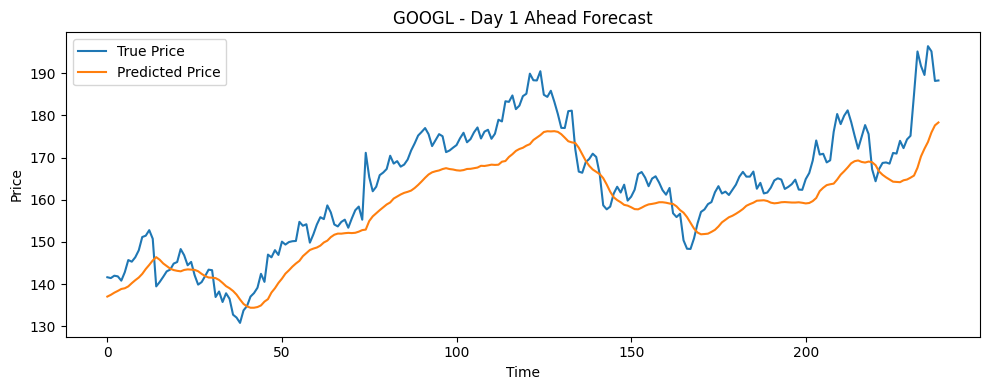

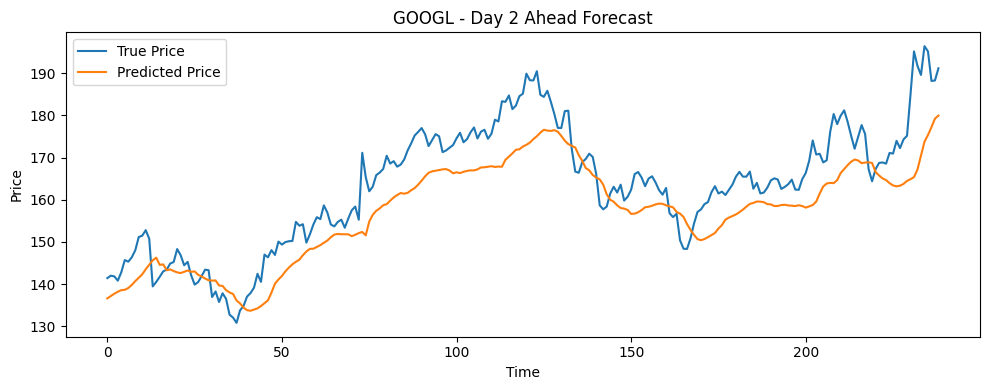

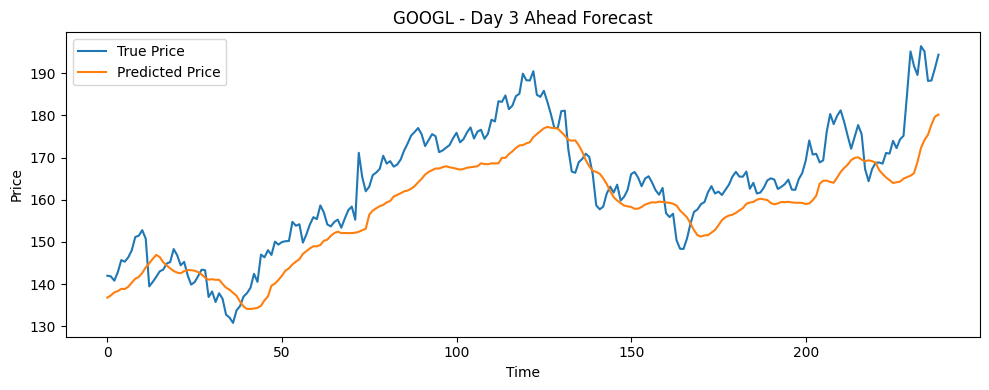

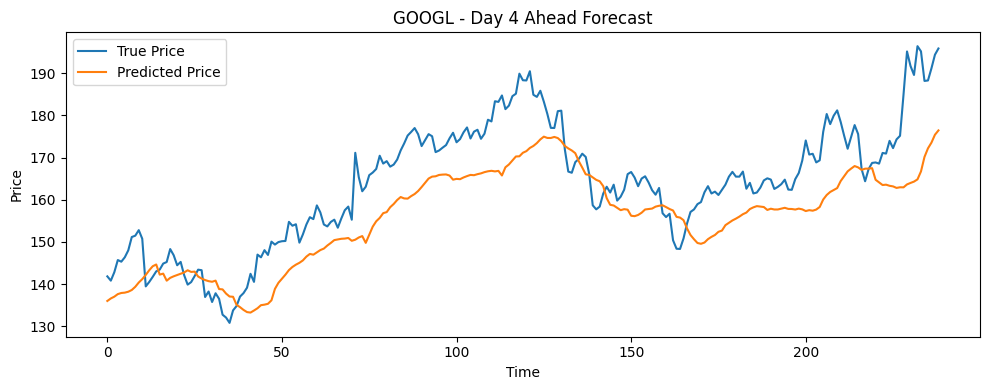

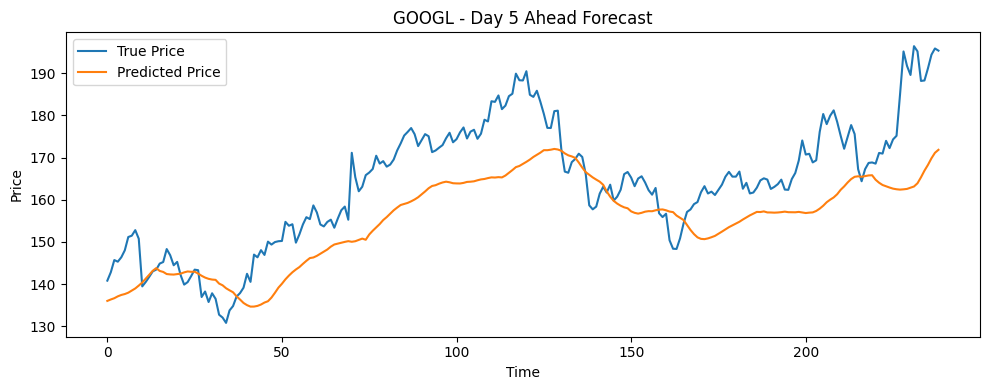

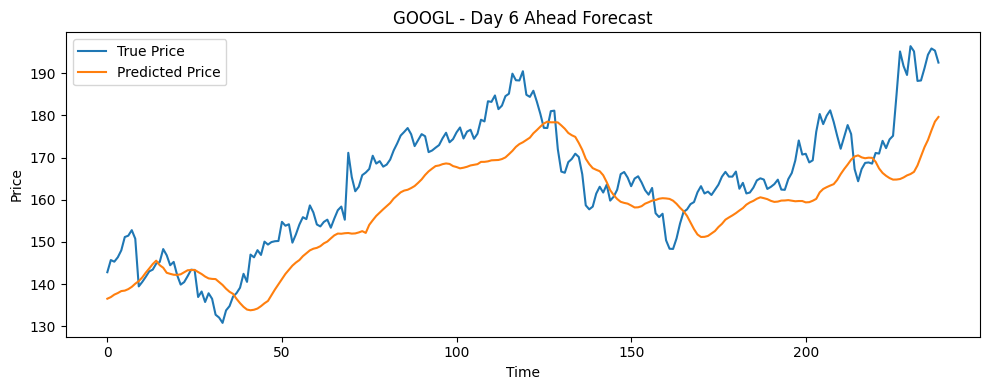

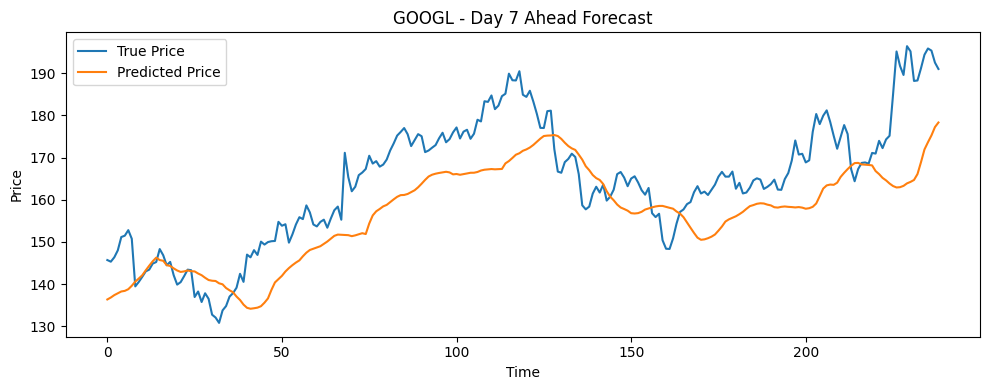

[*********************100%***********************]  1 of 1 completed

📊 GOOGL Average RMSE over 7 days: 9.6872
📊 GOOGL Average MAPE over 7 days: 4.83%

📈 Processing AMZN...




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


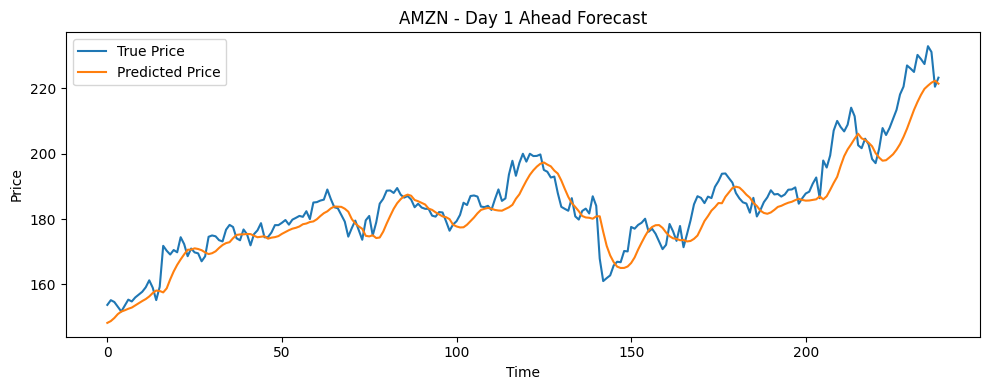

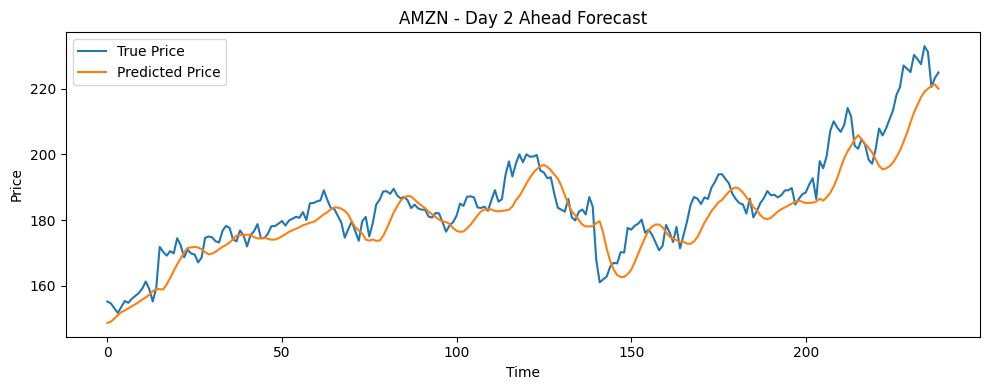

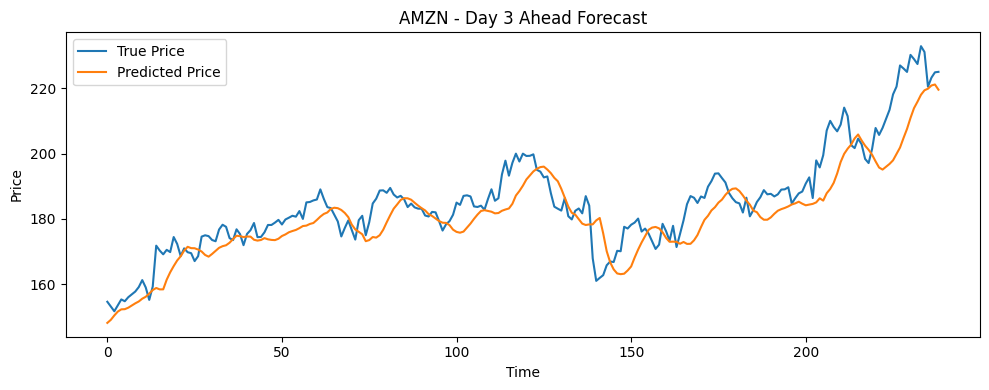

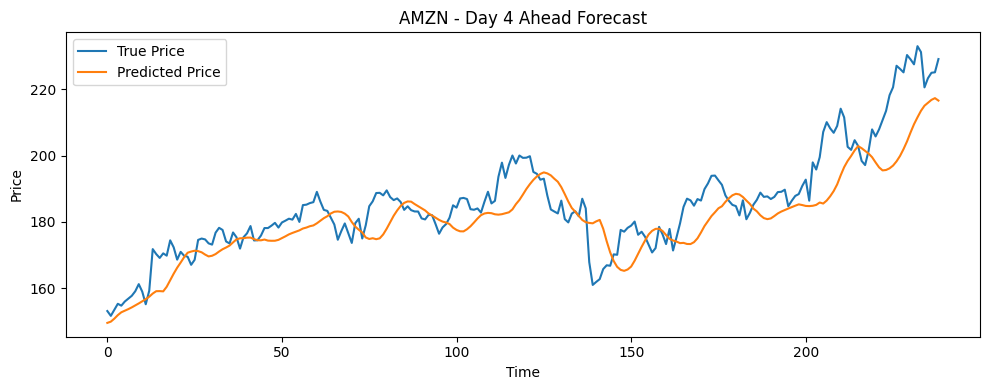

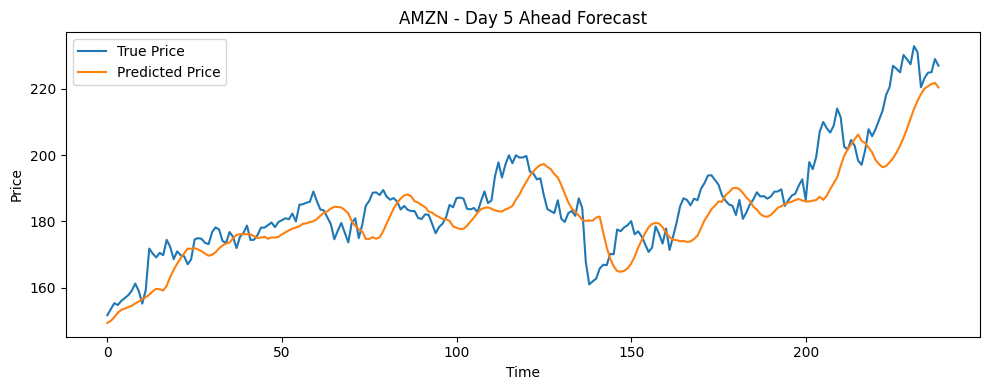

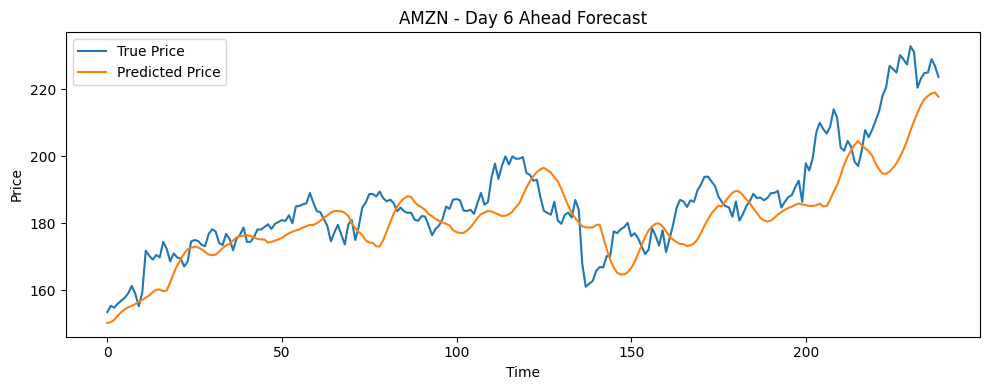

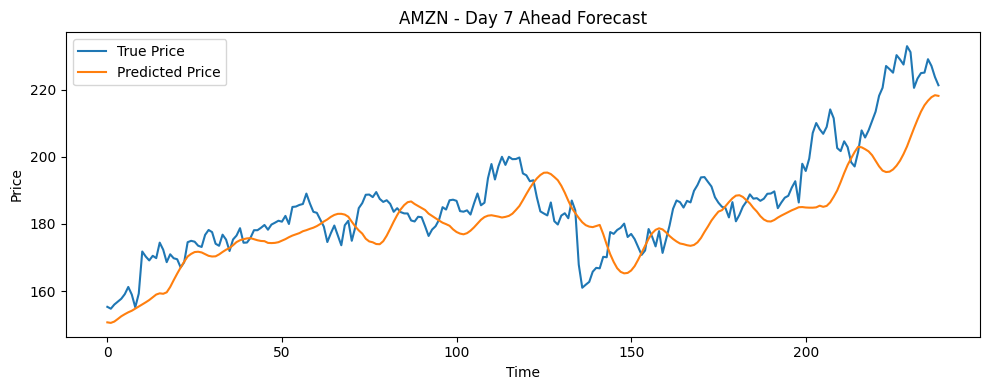

📊 AMZN Average RMSE over 7 days: 8.6275
📊 AMZN Average MAPE over 7 days: 3.51%


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Tickers to analyze
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

# Settings
window_size = 60
forecast_horizon = 7  # Predict 7 days ahead
epochs = 20
batch_size = 32

def prepare_data(df):
    df = df[['Close', 'High', 'Low', 'Volume']]
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    X, y = [], []
    for i in range(window_size, len(scaled_data) - forecast_horizon + 1):
        X.append(scaled_data[i - window_size:i])
        y.append([scaled_data[i + j][0] for j in range(forecast_horizon)])

    X, y = np.array(X), np.array(y)

    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    return X_train, X_test, y_train, y_test, scaler

def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(forecast_horizon))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


# Initialize results dictionary
results = {
    'Ticker': [],
    '1-Day RMSE': [],
    '1-Day MAPE (%)': [],
    '7-Day RMSE': [],
    '7-Day MAPE (%)': []
}






for ticker in tickers:
    print(f"\n📈 Processing {ticker}...\n")
    df = yf.download(ticker, start='2020-01-01', end='2024-12-31')
    X_train, X_test, y_train, y_test, scaler = prepare_data(df)

    model = build_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Predict
    predicted = model.predict(X_test)

    # Rescale predictions
    def inverse_transform(batch):
        padded = np.zeros((len(batch), 4))
        padded[:, 0] = batch
        return scaler.inverse_transform(padded)[:, 0]

    rmse_list, mape_list = [], []

    for day in range(forecast_horizon):
        true_vals = inverse_transform(y_test[:, day])
        pred_vals = inverse_transform(predicted[:, day])
        rmse = np.sqrt(mean_squared_error(true_vals, pred_vals))
        mape = mean_absolute_percentage_error(true_vals, pred_vals) * 100
        rmse_list.append(rmse)
        mape_list.append(mape)

        # Plot for each day
        plt.figure(figsize=(10, 4))
        plt.plot(true_vals, label='True Price')
        plt.plot(pred_vals, label='Predicted Price')
        plt.title(f'{ticker} - Day {day + 1} Ahead Forecast')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()
        plt.tight_layout()
        plt.show()

    print(f"📊 {ticker} Average RMSE over 7 days: {np.mean(rmse_list):.4f}")
    print(f"📊 {ticker} Average MAPE over 7 days: {np.mean(mape_list):.2f}%")
